In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sounddevice as sd

# Load the audio file
audio_path = "audio/Performance.wav"
metronome_path = "audio/Metronomo.wav"
drum_data, drum_sampling_rate = librosa.load(audio_path,sr=100, duration=5)
metronome_data, sampling_rate = librosa.load(metronome_path,sr=100, duration=1)
len(metronome_data)

100

In [2]:
for i in range(len(drum_data)):
    if abs(drum_data[i]) > 0.005:
        print(i)

410
412
443


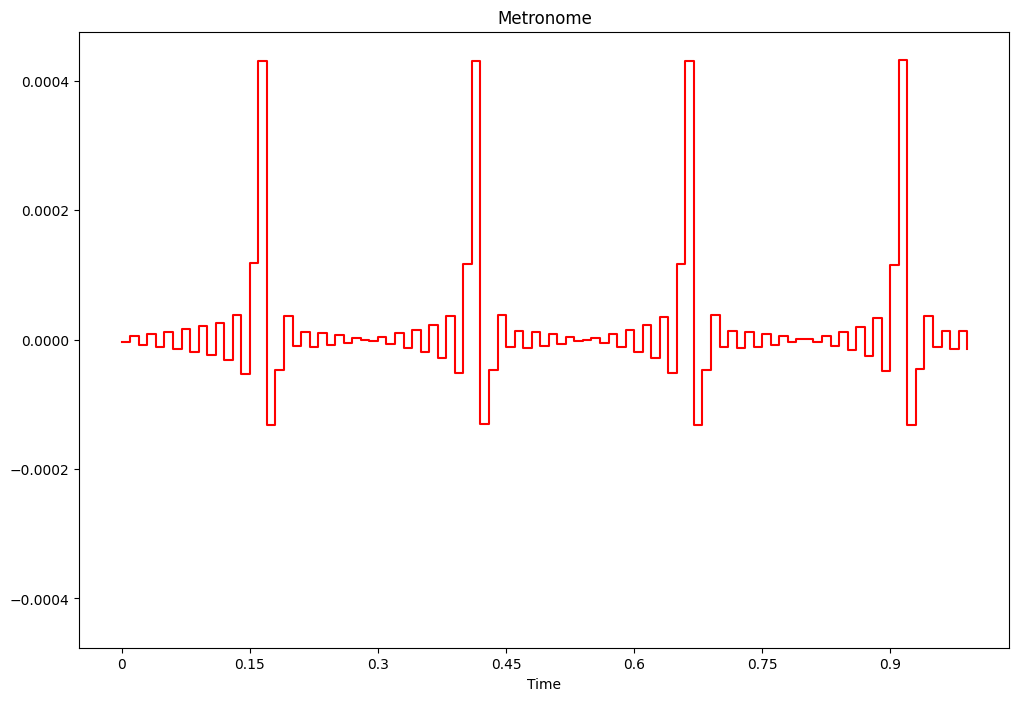

In [3]:
plt.figure(figsize=(12, 8))
librosa.display.waveshow(y=metronome_data, sr=sampling_rate,color='r')
plt.title("Metronome")
plt.show()

In [4]:
len(metronome_data), metronome_data

(100,
 array([-4.07676544e-06,  6.11210407e-06, -7.65735786e-06,  9.21340052e-06,
        -1.06899815e-05,  1.26249124e-05, -1.42447971e-05,  1.63487857e-05,
        -1.83282900e-05,  2.06742516e-05, -2.32423135e-05,  2.63794973e-05,
        -3.07544651e-05,  3.79742814e-05, -5.32612758e-05,  1.18108008e-04,
         4.30649583e-04, -1.31246430e-04, -4.64956065e-05,  3.68824003e-05,
        -9.18041223e-06,  1.14379045e-05, -1.07531177e-05,  9.78583557e-06,
        -8.25859297e-06,  6.62870207e-06, -4.99974612e-06,  2.75991806e-06,
        -6.57113219e-07, -1.95023631e-06,  4.28590010e-06, -7.05789671e-06,
         9.91818706e-06, -1.25814213e-05,  1.57510094e-05, -1.89877046e-05,
         2.31529302e-05, -2.80453605e-05,  3.59428086e-05, -5.21386573e-05,
         1.17545780e-04,  4.30563523e-04, -1.30860659e-04, -4.72113388e-05,
         3.76078679e-05, -1.08559007e-05,  1.30450626e-05, -1.24872304e-05,
         1.12641628e-05, -1.01670093e-05,  8.47405681e-06, -6.45048794e-06,
      

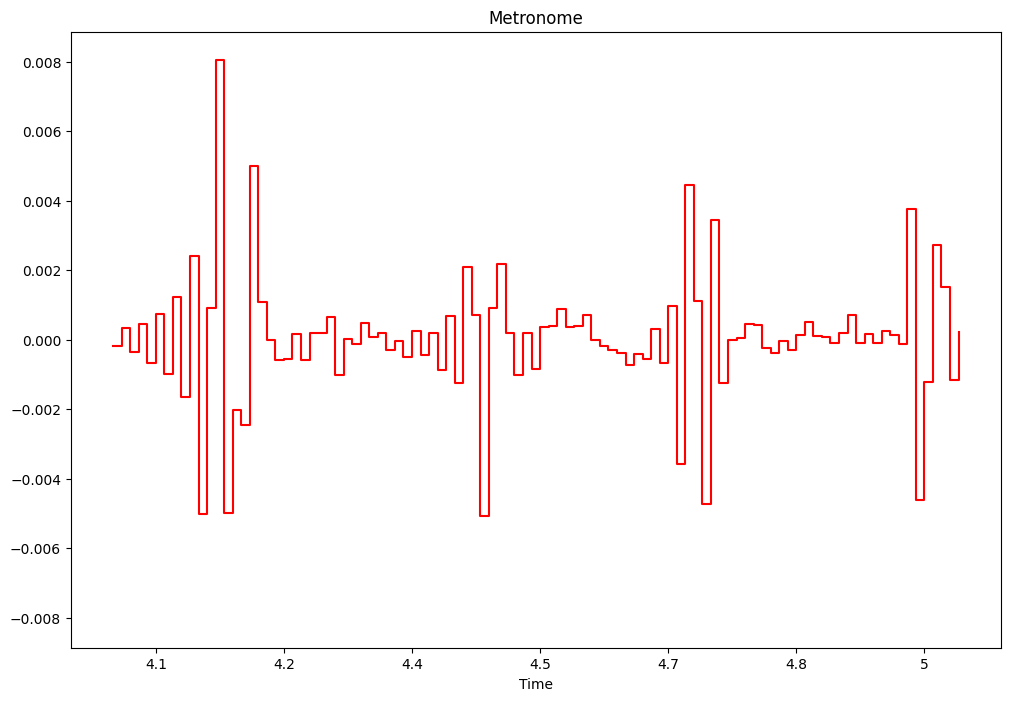

In [5]:
plt.figure(figsize=(12, 8))
librosa.display.waveshow(y=drum_data[400:], sr=drum_sampling_rate,offset=4, color='r')
plt.title("Metronome")
plt.show()

In [6]:
drum_data, drum_sampling_rate = librosa.load(audio_path)
metronome_data, sampling_rate = librosa.load(metronome_path)
drum_beat_times= librosa.onset.onset_detect(y=drum_data, sr=drum_sampling_rate, units='time')
metronome_beat_times = librosa.onset.onset_detect(y=metronome_data, sr=sampling_rate, units='time')

In [7]:
drum_beat_strength = librosa.onset.onset_strength(y=drum_data, sr=drum_sampling_rate)
#TODO: you can get the times at which these occur by by doing a frames to beat thing 
drum_beat_strength, len(drum_beat_strength)

(array([0.        , 0.        , 0.        , ..., 0.05245194, 0.        ,
        0.03428751], dtype=float32),
 3976)

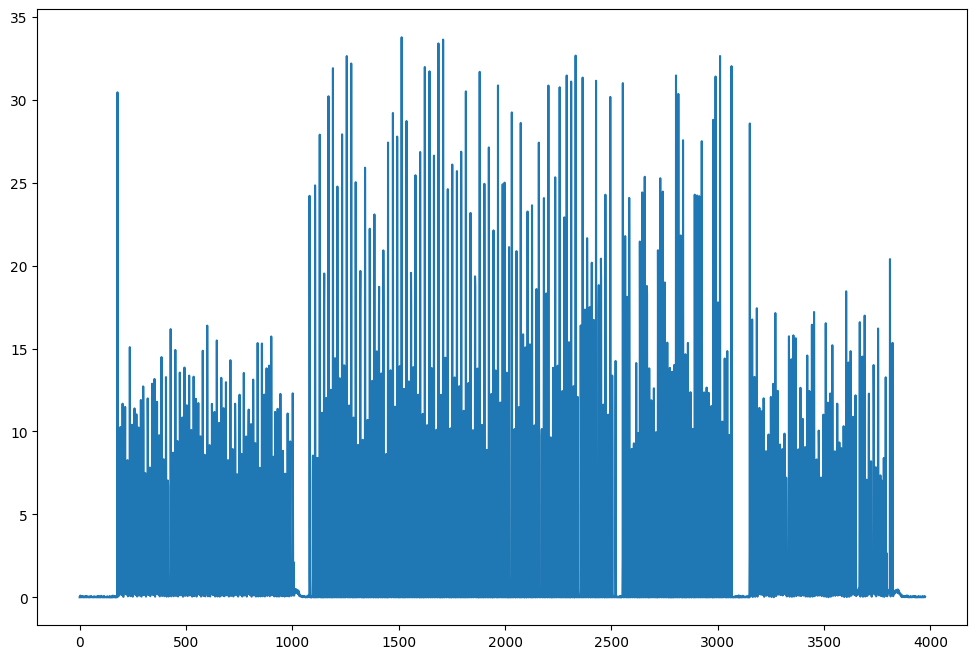

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(drum_beat_strength)

help(librosa.onest)

Text(0.5, 1.0, 'Onset Detection')

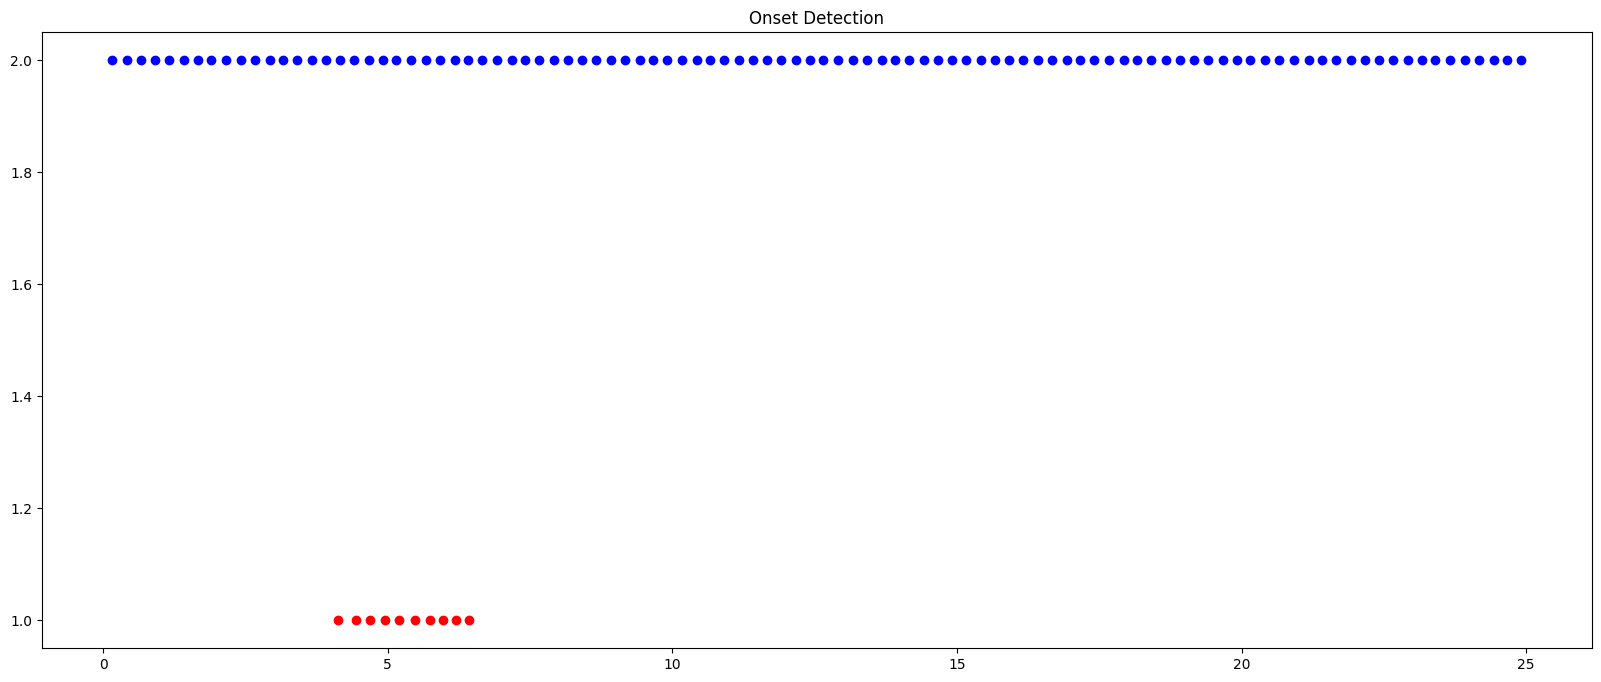

In [9]:
plt.figure(figsize=(20, 8))
plt.scatter(drum_beat_times[:10], np.ones(10), color='r')
plt.scatter(metronome_beat_times[:100], np.ones(100)*2, color='b')
plt.title("Onset Detection")

In [10]:
#  Removing the startomg time
drum_beat_times = (drum_beat_times-drum_beat_times[0])*10
drum_beat_times = np.round(drum_beat_times, 3)
#  Finding the difference between the beats
diffreneza = np.diff(drum_beat_times)
diffreneza = np.concatenate(([0], diffreneza))

data = pd.DataFrame({'Tempo(ds)':drum_beat_times, 'Difference(ds)':diffreneza})
data.head(10)

,Tempo(ds),Difference(ds)
0,0.000,0.000
1,3.019,3.019
2,5.573,2.554
3,8.127,2.554
4,10.681,2.554
5,13.468,2.787
6,16.022,2.554
7,18.344,2.322
8,20.666,2.322
9,22.988,2.322


In [11]:
metronome_times = (metronome_beat_times - metronome_beat_times[0]) * 10

# Round metronome_times to three decimal places
metronome_times = metronome_times.round(3)

# Calculate differences between consecutive elements of metronome_times
metronomo_diff = np.diff(metronome_times)

# Prepend a zero to metronomo_diff
metronomo_diff = np.concatenate(([0], metronomo_diff))

print(len(metronomo_diff), len(metronome_times))
data = pd.DataFrame({'Tempo(ds)':metronome_times, 'Difference(ds)': metronomo_diff})

350 350


In [12]:
onset_env = librosa.onset.onset_strength(y=drum_data, sr=drum_sampling_rate)
drum_beat_times = librosa.onset.onset_detect(onset_envelope=onset_env, sr=drum_sampling_rate, units='time')
drum_beat_times
time_other, onset_strength = librosa.times_like(onset_env), librosa.util.normalize(onset_env)
other_df = pd.DataFrame({'Times':time_other, 'Onset Strength':onset_strength})

In [13]:
# Filter the df to keep only the rows where onset_strength is greater than 0.5
onset_df = other_df[other_df['Onset Strength'] > 0.3]


# NOTE: difffrent methods record the same nuber of beats so the results are reliable 
len(onset_df), len(drum_beat_times)

(325, 325)

In [14]:
def grafico(df, time_start = 0, time_end = None): 
    plt.figure(figsize=(12, 8))
    if time_end is not None:
        df = df[(df['Times'] >= time_start) & (df['Times'] <= time_end)]
    plt.plot(df['Times'], df['Onset Strength'])  
    plt.show()

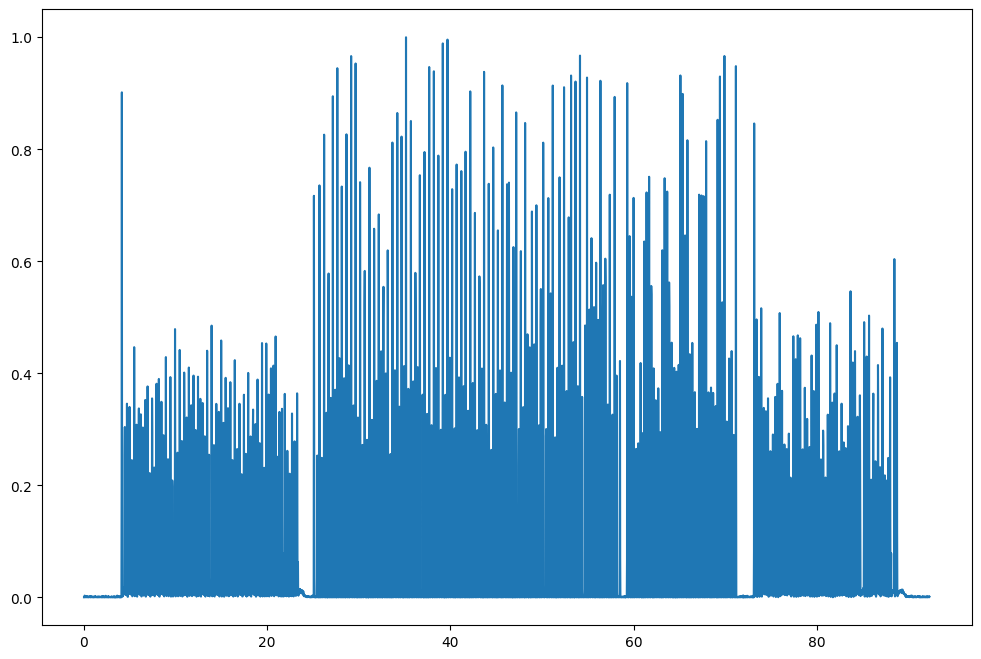

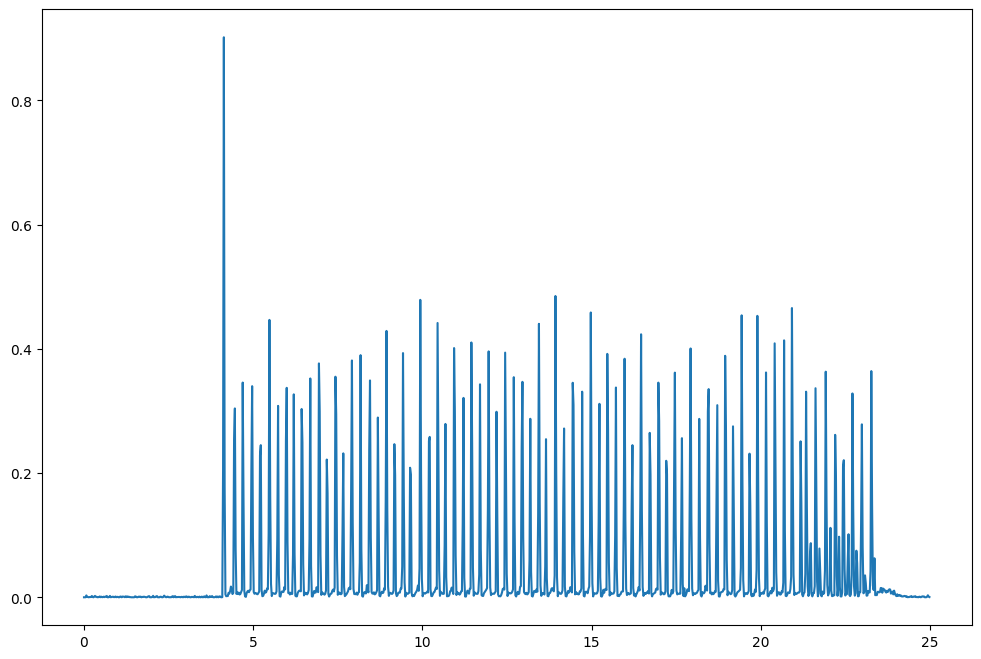

In [15]:
grafico(other_df)
grafico(other_df, time_start = 0, time_end = 25)


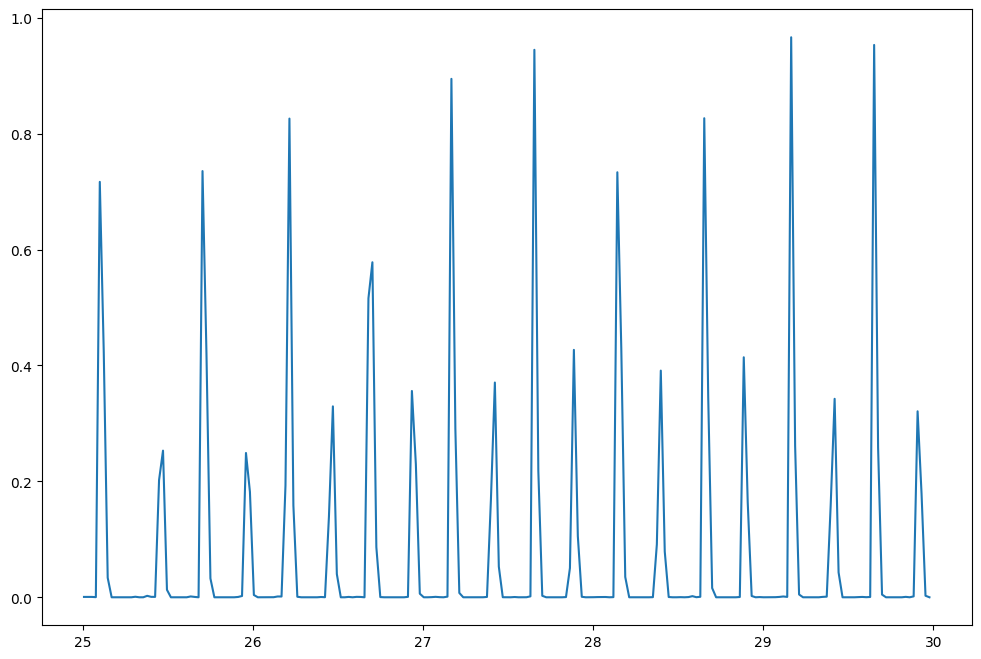

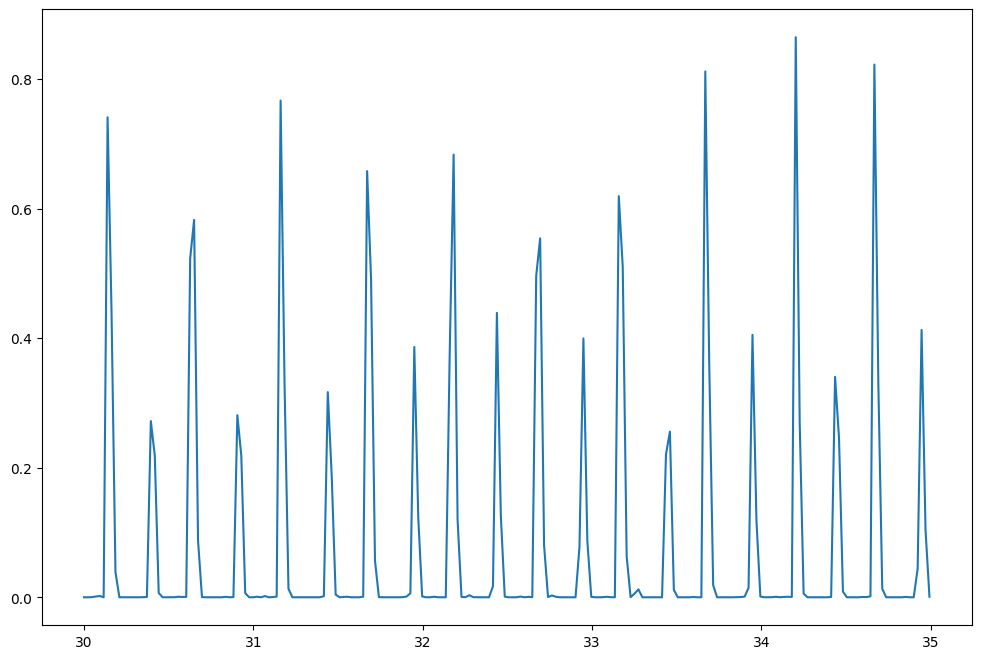

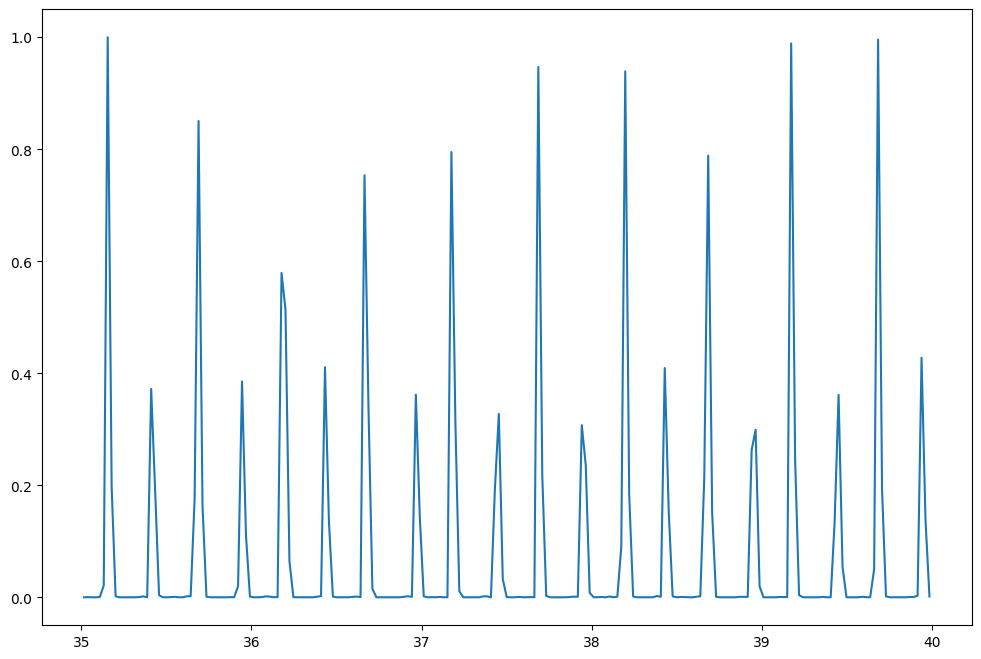

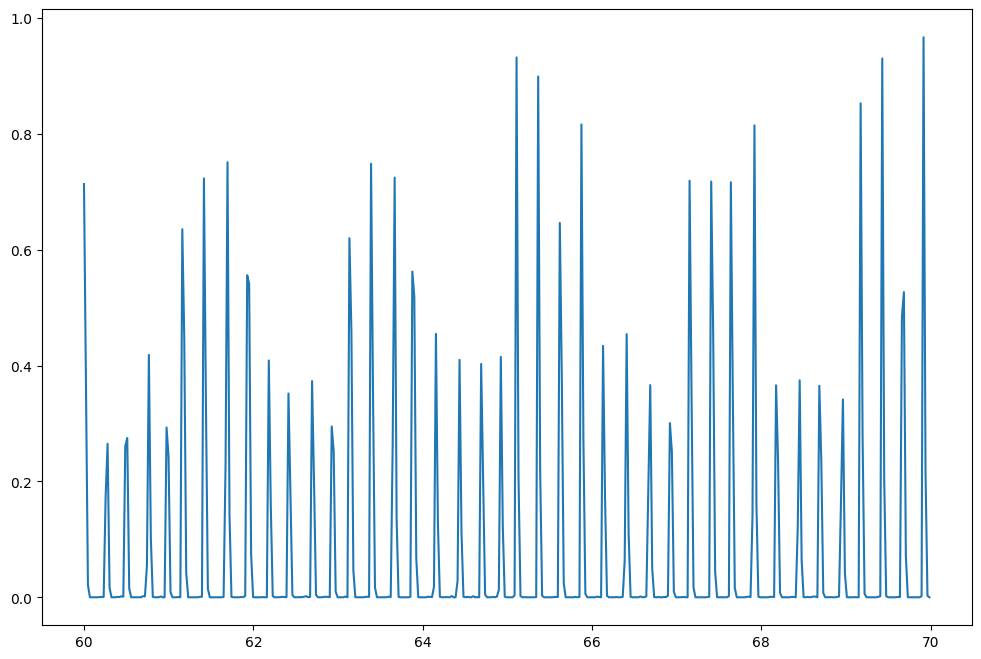

In [16]:
grafico(other_df, time_start = 25, time_end = 30)
grafico(other_df, time_start = 30, time_end = 35)
grafico(other_df, time_start = 35, time_end = 40)
grafico(other_df, time_start = 60, time_end = 70)

In [17]:
# get the diffrence between each time and the next
diff = np.diff(drum_beat_times)

for i in range(len(diff)):
    if diff[i] > 0.5:
        print(diff[i])
        print(i)

first_set = drum_beat_times[:78]
second_set = drum_beat_times[78:213]
third_set = drum_beat_times[213:]

(sum(first_set) + sum(second_set))/60

1.8343764172335604
78
0.8126984126984098
213
1.9969160997732303
262


111.3729644746788

In [18]:
def play_audio_slow(y, sr, speed_factor):
    y_slow = librosa.effects.time_stretch(y, rate=speed_factor)
    sd.play(y_slow, sr)

play_audio_slow(metronome_data, sampling_rate, 0.2)

In [19]:
play_audio_slow(drum_data, drum_sampling_rate, 0.2)

In [20]:
metronome_data

array([-6.1228855e-07,  1.6854610e-06,  3.8645503e-06, ...,
       -3.9805548e-07,  5.1953475e-06, -5.2121632e-06], dtype=float32)